In [2]:
import os
import sys
import struct
import pprint
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
%pylab inline
pp = pprint.PrettyPrinter(indent=2)
from TraceInc import AutoDict


Populating the interactive namespace from numpy and matplotlib


In [3]:
def out_degree(tmap):
    partners = []
    recvSet = set()
    for sk in tmap:
        for cta in tmap[sk]:
            for sit in tmap[sk][cta]:
                for rk in tmap[sk][cta][sit]:
                    partners.append(len(tmap[sk][cta][sit][rk]))
    return partners

In [4]:
def in_degree(tmap):
    partners = AutoDict()
    degree = []
    for sk in tmap:
        for cta in tmap[sk]:
            for sit in tmap[sk][cta]:
                for rk in tmap[sk][cta][sit]:
                    for rcta in tmap[sk][cta][sit][rk]:
                        for rit in tmap[sk][cta][sit][rk][rcta]:
                            if not partners[rcta][sit]:
                                partners[rcta][sit] = set()
                            partners[rcta][sit].add(cta)
    for cta in partners:
        for it in partners[cta]:
            degree.append(len(partners[cta][it]))
    return degree

In [5]:
binArray = [1,2,4,8,16,64,128,256,512,768,1024,10000]

In [6]:
files = ['hs2d', 'hs3d','hist', 'nbody', 'path', 'bfs']
fpath = '../data/'

In [7]:
volsIn = {}
volsOut = {}
for n in binArray:
    volsIn[n] = []
    volsOut[n] = []
for f in files:
    tmap = pickle.load( open(fpath+f+'.transfermap', "rb"))
    indeg = in_degree(tmap)
    print(f)
    (cnt, bins,_) = hist(indeg, alpha=0.75, bins=binArray)
    for i,n in enumerate(cnt):
        volsIn[binArray[i]].append((n/sum(cnt))*100)
    outdeg = out_degree(tmap)
    (cnt, bins,_) = hist(outdeg, alpha=0.75, bins=binArray)
    for i,n in enumerate(cnt):
        volsOut[binArray[i]].append((n/sum(cnt))*100)
pp.pprint(volsIn)
pp.pprint(volsOut)

plt.clf()

hs2d
hs3d
hist
nbody
path
bfs
{ 1: [ 0.0,
       0.0,
       0.0,
       55.555555555555557,
       10.606060606060606,
       13.601728647788015],
  2: [ 0.2163331530557058,
       26.171875,
       0.0,
       0.0,
       89.393939393939391,
       12.722241176693583],
  4: [8.8696592752839383, 73.828125, 0.0, 0.0, 0.0, 8.3702945524849319],
  8: [90.914007571660363, 0.0, 0.0, 0.0, 0.0, 12.904204101747602],
  16: [0.0, 0.0, 0.0, 44.444444444444443, 0.0, 15.610902611926154],
  64: [0.0, 0.0, 0.0, 0.0, 0.0, 4.2458015845938055],
  128: [0.0, 0.0, 0.0, 0.0, 0.0, 17.771712346942646],
  256: [0.0, 0.0, 0.0, 0.0, 0.0, 7.3694984646878199],
  512: [0.0, 0.0, 0.0, 0.0, 0.0, 7.4036165131354483],
  768: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  1024: [0.0, 0.0, 100.0, 0.0, 0.0, 0.0],
  10000: []}
{ 1: [0.0, 0.0, 0.0, 55.555555555555557, 10.691144708423327, 5.236437009795945],
  2: [ 0.2163331530557058,
       26.171875,
       0.0,
       0.0,
       89.308855291576677,
       7.2249161974810434],
  4: [

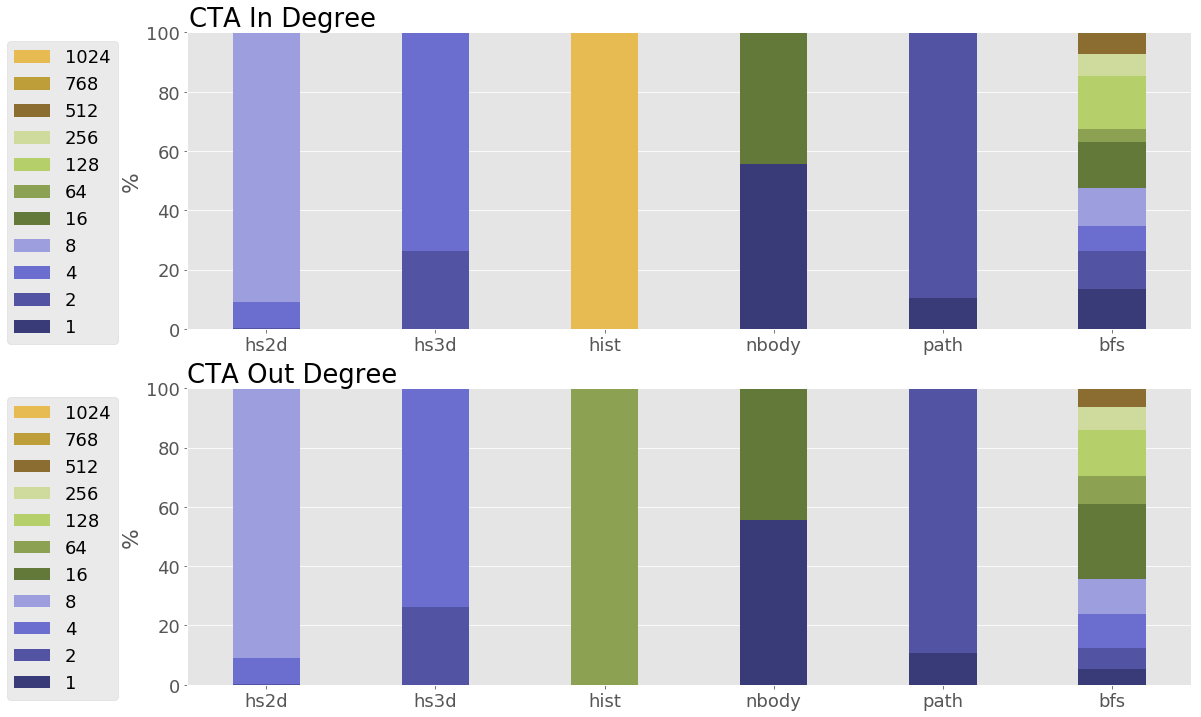

In [16]:
pylab.rcParams['figure.figsize'] = (18, 12)
plt.style.use('ggplot')

matplotlib.rcParams.update({'font.size': 18})
cmap = matplotlib.cm.get_cmap('tab20b')
c = cmap.colors

ind = np.arange(len(files))
width = 0.4
plt.subplot(211)
bottom = np.zeros(len(files))
for (inx,key) in enumerate(binArray[0:-1]):
    plt.bar(ind,volsIn[key], label=str(key), width=width, bottom=bottom, color=c[inx])
    bottom += np.array(volsIn[key])
#plt.xlabel('Transaction Members')
plt.ylabel('%')
plt.title('CTA In Degree', x=0.095)
plt.xticks(ind, files)
plt.legend(bbox_to_anchor=(-0.06,1.0))
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(-0.06,1.0))

plt.subplot(212)
bottom=np.zeros(len(files))
for (inx,key) in enumerate(binArray[0:-1]):
    plt.bar(ind,volsOut[key], label=str(key), width=width, bottom=bottom,color=c[inx])
    bottom += np.array(volsOut[key])
plt.xticks(ind, files)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(-0.06,1.0))
#plt.xlabel('Transaction Members')
plt.ylabel('%')
plt.title('CTA Out Degree', x=0.105)
filename = '../plots/cta-degree.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()